#### Time series plot of domain/annual average CAPEMax
bias corrected vs original

Ming Ge June 2025

In [1]:
import numpy
import datetime
import os
import glob
from calendar import isleap
from tqdm import tqdm
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

#### Read Original data

In [2]:
year_s = 1960
year_e = 2100

n_year = year_e - year_s + 1

dir_lens = '/glade/campaign/mmm/c3we/mingge/LENS2/6hr/'
dir_cor  = '/glade/campaign/mmm/c3we/mingge/QBE/'
dir_cor_old = '/glade/campaign/mmm/c3we/mingge/QBE_old/'

n_mem = 10

cape_2d = np.zeros((n_mem,  n_year))
 
for mm in range(1, n_mem+1):
    print(mm)
    n_s = 0
    flnms = sorted(glob.glob(dir_lens + '*_LENS2_HailPredictors_' + str(mm).zfill(3) +'.nc'))[11:]
    
    for nn in range(len(flnms)):
        with xr.open_dataset(flnms[nn]) as ds:
            cape = ds.CAPEmax.resample(time='1Y').mean().mean(dim=('lat', 'lon'))
            if len(cape) != 10:
                n_e = n_s + len(cape) - 1
                cape_2d[mm-1, n_s:n_e] = cape[:-1]
            else:
                n_e = n_s + len(cape)
                cape_2d[mm-1, n_s:n_e] = cape
            n_s = n_e

1
2
3
4
5
6
7
8
9
10


#### Historical Bias Corrected data

In [3]:
year_s = 1960
year_e = 2014

n_year = year_e - year_s + 1

cape_cor_1 = np.zeros((n_mem,  n_year))
cape_cor_old_1 = np.zeros((n_mem,  n_year))
for mm in range(1, n_mem+1):
    print(mm)
    flnms = sorted(glob.glob(dir_cor + 'hailpredictors_lens_' + str(mm).zfill(2) +'_corrected.nc')) #[11:]
    flnms_old = sorted(glob.glob(dir_cor_old + 'hailpredictors_lens_' + str(mm).zfill(2) +'_corrected.nc')) 
    
    for nn in range(len(flnms)):
        with xr.open_dataset(flnms[nn]) as ds:
            #print(flnms[nn])
            cape = ds.hailpredictors.mean(dim=('Julian_day', 'lat', 'lon'))[:,0]
            cape_cor_1[mm-1] = cape

        with xr.open_dataset(flnms_old[nn]) as ds:
            cape = ds.hailpredictors.mean(dim=('Julian_day', 'lat', 'lon'))[:,0]
            cape_cor_old_1[mm-1] = cape
             

1
2
3
4
5
6
7
8
9
10


#### Future senario

In [4]:
year_s = 2015
year_e = 2100
n_year = year_e - year_s + 1

cape_cor_2 = np.zeros((n_mem,  n_year))
cape_cor_old_2 = np.zeros((n_mem,  n_year))

for mm in range(1, n_mem+1):
    print(mm)
    n_s = 0
    flnms = sorted(glob.glob(dir_cor + 'hailpredictors_2*lens_' + str(mm).zfill(2) +'_corrected.nc')) #[11:]
    flnms_old = sorted(glob.glob(dir_cor_old + 'hailpredictors_2*lens_' + str(mm).zfill(2) +'_corrected.nc')) 
    #print(flnms)
    for nn in range(len(flnms)):
        with xr.open_dataset(flnms[nn]) as ds:
            #print(flnms[nn])
            cape = ds.hailpredictors.mean(dim=('Julian_day', 'lat', 'lon'))[:,0]
            n_e = n_s + len(cape)
             
            cape_cor_2[mm-1, n_s:n_e] = cape
            

        with xr.open_dataset(flnms_old[nn]) as ds:
            cape = ds.hailpredictors.mean(dim=('Julian_day', 'lat', 'lon'))[:,0]
             
            cape_cor_old_2[mm-1, n_s:n_e] = cape
            
        n_s = n_e


1
2
3
4
5
6
7
8
9
10


#### Plotting

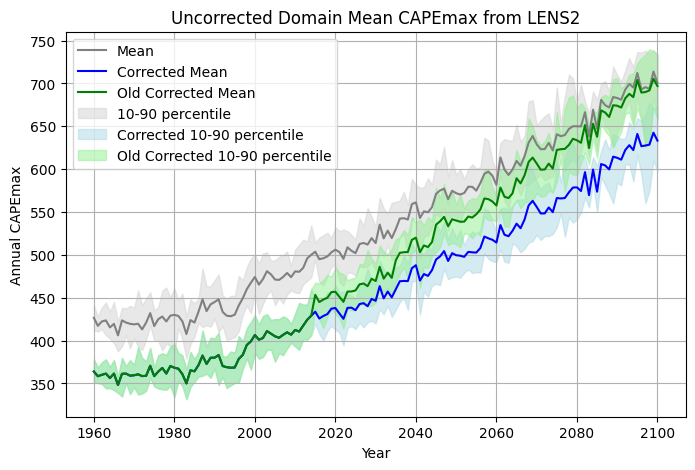

In [6]:
# Concatenate along the second dimension (columns)
cape_cor = np.concatenate([cape_cor_1, cape_cor_2], axis=1)
cape_cor_old = np.concatenate([cape_cor_old_1, cape_cor_old_2], axis=1)

# Average over the first dimension (axis=0)
mean = np.mean(cape_2d, axis=0)
mean_cor = np.mean(cape_cor, axis=0)
mean_cor_old = np.mean(cape_cor_old, axis=0)

# 10th and 90th percentiles over the first dimension
p10 = np.percentile(cape_2d, 10, axis=0)
p90 = np.percentile(cape_2d, 90, axis=0)
p10_cor = np.percentile(cape_cor, 10, axis=0)
p90_cor = np.percentile(cape_cor, 90, axis=0)
p10_cor_old = np.percentile(cape_cor_old, 10, axis=0)
p90_cor_old = np.percentile(cape_cor_old, 90, axis=0)

years = np.arange(1960, 2101) 
#x = np.arange(cape_2d.shape[1])  # e.g. 0 to 49
plt.figure(figsize=(8,5))
plt.plot(years, mean, label='Mean', color='grey')
plt.plot(years, mean_cor, label='Corrected Mean', color='blue')
plt.plot(years, mean_cor_old, label='Old Corrected Mean', color='green')
plt.fill_between(years, p10, p90, color='lightgrey', alpha=0.5, label='10-90 percentile')
plt.fill_between(years, p10_cor, p90_cor, color='lightblue', alpha=0.5, label='Corrected 10-90 percentile')
plt.fill_between(years, p10_cor_old, p90_cor_old, color='lightgreen', alpha=0.5, label='Old Corrected 10-90 percentile')

plt.xlabel('Year')
plt.ylabel('Annual CAPEmax')
plt.title('Uncorrected Domain Mean CAPEmax from LENS2')
plt.legend()
plt.grid(True)
plt.show()

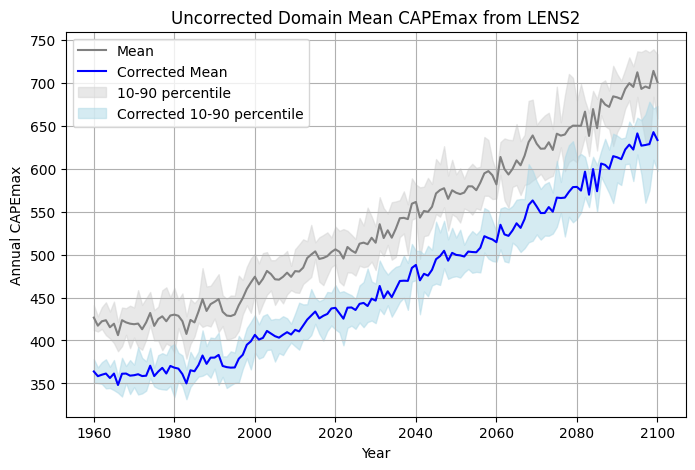

In [7]:
# Concatenate along the second dimension (columns)
cape_cor = np.concatenate([cape_cor_1, cape_cor_2], axis=1)

# Average over the first dimension (axis=0)
mean = np.mean(cape_2d, axis=0)
mean_cor = np.mean(cape_cor, axis=0)

# 10th and 90th percentiles over the first dimension
p10 = np.percentile(cape_2d, 10, axis=0)
p90 = np.percentile(cape_2d, 90, axis=0)
p10_cor = np.percentile(cape_cor, 10, axis=0)
p90_cor = np.percentile(cape_cor, 90, axis=0)

years = np.arange(1960, 2101) 
#x = np.arange(cape_2d.shape[1])  # e.g. 0 to 49
plt.figure(figsize=(8,5))
plt.plot(years, mean, label='Mean', color='grey')
plt.plot(years, mean_cor, label='Corrected Mean', color='blue')
plt.fill_between(years, p10, p90, color='lightgrey', alpha=0.5, label='10-90 percentile')
plt.fill_between(years, p10_cor, p90_cor, color='lightblue', alpha=0.5, label='Corrected 10-90 percentile')

plt.xlabel('Year')
plt.ylabel('Annual CAPEmax')
plt.title('Uncorrected Domain Mean CAPEmax from LENS2')
plt.legend()
plt.grid(True)
plt.show()